# Churn Prediction

The project we're describing involves churn prediction, which is a common application in the field of machine learning. **Churn refers to the phenomenon where customers decide to leave a company.** Predicting churn is crucial for businesses as **it helps them understand why and when customers are likely to stop using their services.** By building an accurate churn prediction model, companies can take proactive measures to retain customers and prevent them from leaving.

Here's a breakdown of the project's key details:

**Dataset Information:**
- The dataset we're using is titled "Telco Customer Churn," and it's available on Kaggle.
- It comprises information on 7043 customers.
- The dataset includes 20 independent variables (features) and 1 dependent variable (target).
- The target variable indicates whether a customer has left the company recently (churn=yes) or not.
####  Since the target variable has two states (yes/no or 1/0), this is a binary classification problem.

**Features (Independent Variables):**
1. `customerID`: Unique identifier for each customer (irrelevant for churn prediction).
2. `gender`: Gender of the customer.
3. `SeniorCitizen`: Whether the customer is a senior citizen or not (1 for yes, 0 for no).
4. `Partner`: Whether the customer has a partner or not (Yes or No).
5. `Dependents`: Whether the customer has dependents or not (Yes or No).
6. `tenure`: Number of months the customer has stayed with the company.
7. `PhoneService`: Whether the customer has a phone service or not (Yes or No).
8. `MultipleLines`: Whether the customer has multiple phone lines (Yes, No, No phone service).
9. `InternetService`: Customer's internet service provider (DSL, Fiber optic, No internet service).
10. `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
11. `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
12. `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
13. `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
14. `StreamingTV`: Whether the customer has streaming TV (Yes, No, No internet service).
15. `StreamingMovies`: Whether the customer has streaming movies (Yes, No, No internet service).
16. `Contract`: The contract term of the customer (Month-to-month, One year, Two years).
17. `PaperlessBilling`: Whether the customer has paperless billing (Yes or No).
18. `PaymentMethod`: The customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card).
19. `MonthlyCharges`: The monthly amount charged to the customer.
20. `TotalCharges`: The total amount charged to the customer over time.

**Project Goals and Approach:**
- The goal of the project is to build a predictive model that accurately forecasts whether a customer will churn or not based on the provided features.
- The provided dataset seems comprehensive and contains potentially relevant information for churn prediction.
- During the project, we'll likely perform 
       * data preprocessing, 
       * exploratory data analysis, 
       * feature selection or engineering, 
       * model selection, training, and evaluation.
- By analyzing the relationships between features and the target variable, we aim to uncover insights that could help identify patterns associated with customer churn.
- The ultimate aim is to deploy a robust churn prediction model that aids businesses in making informed decisions to retain customers effectively.

In summary, this project involves using a dataset containing various customer attributes to predict whether customers are likely to churn from a company's services. Through thorough analysis and machine learning techniques, we aim to build an accurate model that can assist businesses in preventing customer attrition.

### Importing the data set

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting in Jupyter notebooks
%matplotlib inline


In [2]:
# Read a CSV file into a Pandas DataFrame
df = pd.read_csv("Telco-Customer-Churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

# Exploratory Data Analysis

In [5]:
#missing values in the data set
df.isna().sum().sum()    

0

There is no missing value in the data set so we can jump to explore it

In [6]:
# Retrieve and display the column names of the DataFrame

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Display the data types of each column in the DataFrame
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Target variable has imbalanced class distribution. 
* Negative class (Churn=No) is much less than positive class (churn=Yes). 
* Imbalanced class distributions influence the performance of a machine learning model negatively. 

#### We will use upsampling or downsampling to overcome this issue. 

It is always beneficial to explore the features (independent variables) before trying to build a model. Let's first discover the features that only have two values.

In [9]:
# Retrieve column names with binary (two unique values) data
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)


In [10]:
# categorical features with two classes
binary_cols 

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

#### The remaining categorical variables have more than two values (or classes).

In [11]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

# Exploratory Data Analysis

### Binary categorical features

Let's check the class distribution of binary features.

<Axes: xlabel='PaperlessBilling', ylabel='count'>

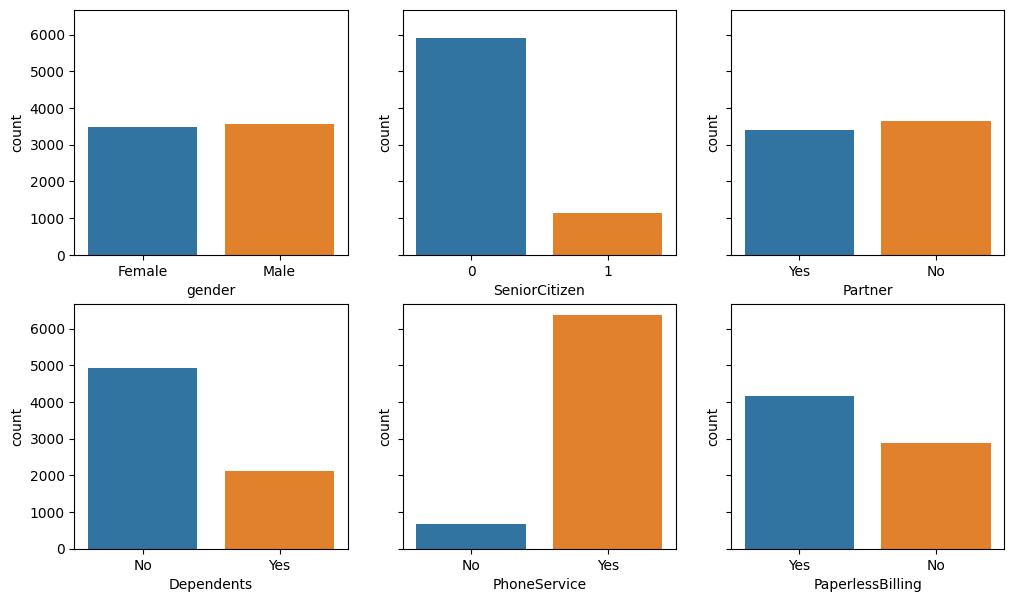

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot(x = "gender", data=df, ax=axes[0,0])
sns.countplot(x ="SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot(x ="Partner", data=df, ax=axes[0,2])
sns.countplot(x ="Dependents", data=df, ax=axes[1,0])
sns.countplot(x ="PhoneService", data=df, ax=axes[1,1])
sns.countplot(x ="PaperlessBilling", data=df, ax=axes[1,2])

There is a **high imbalance** in **SeniorCitizen** and **PhoneService** variables. Most of the customers are not senior and similarly, most customers have a phone service.

It is better to check **how the target variable (churn) changes according to the binary features.** 



In [13]:
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

**To be able to make calculations, we need to change the values of target variable. "Yes" will be 1 and "No" will be 0.**

In [14]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)


In [15]:
# Group by 'gender' and calculate the mean of 'Churn'

df[['gender','Churn']].groupby(['gender']).mean()

# This code helps us to understand how to churn rate(average value of 'churn')
# Differs between genders

,Churn
gender,
Female,0.269209
Male,0.261603


**Average churn rate** for **males** and **females** are approximately the same which **indicates gender variable does not bring a valuable prediction power to a model**. Therefore, I will not use gender variable in the machine learning model.

In [16]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [17]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [18]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [19]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [20]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


**The other binary features have an effect on the target variable.** 

The phone service may also be skipped if you think 2% difference can be ignored. I have decided to use this feature in the model.

You can also use pandas pivot_table function to check the relationship between features and target variable.

In [21]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [22]:
table = pd.pivot_table(df, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


## Other Categorical Features

It is time to explore other categorical features. We also have continuous features such as **tenure**, **monthly charges** and **total charges** which I will discuss in the next part.

There are 6 variables that come with internet service. There variables come into play if customer has internet service.

In [23]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

### Internet Service

<Axes: xlabel='InternetService', ylabel='count'>

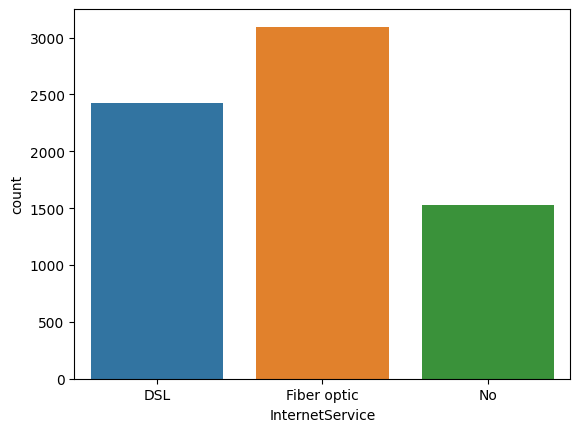

In [24]:
sns.countplot(data=df, x="InternetService")

In [25]:
# Group by 'InternetService' and calculate the mean of 'Churn'
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


- Internet service variable is definitely important in predicting churn rate.
- As you can see, customers with **fiber optic internet service are much likely to churn than other customers** 
- Although there is not a big difference in the **number of customers** with **DSL** and **fiber optic.**
- This company may have some problems with fiber optic connection. However, it is not a good way to make assumptions based on only one variable. Let's also check the monthly charges.

In [26]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

<Axes: xlabel='TechSupport', ylabel='count'>

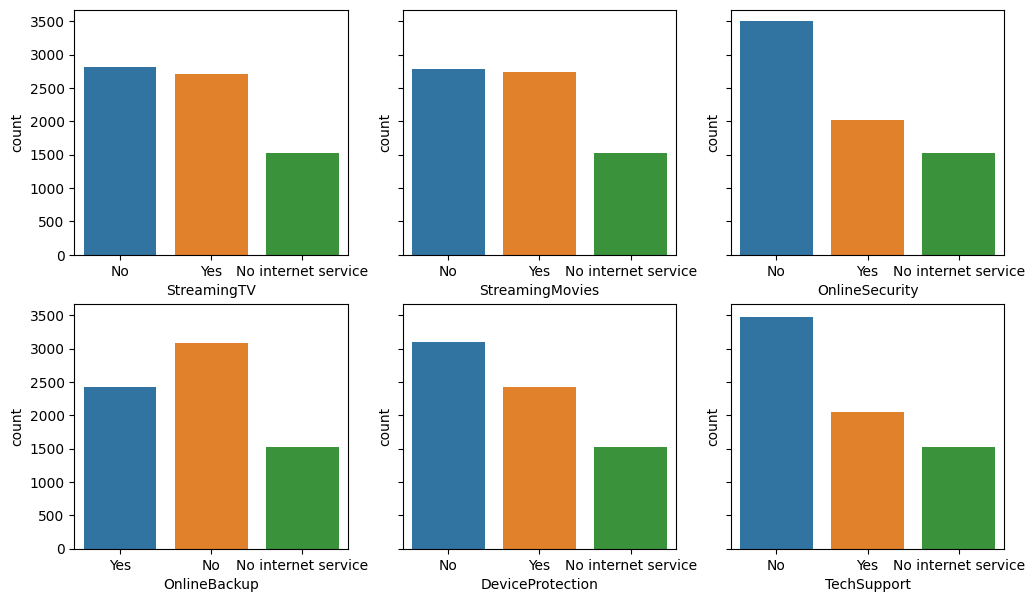

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot(x ="StreamingTV", data=df, ax=axes[0,0])
sns.countplot(x ="StreamingMovies", data=df, ax=axes[0,1])
sns.countplot(x ="OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot(x ="OnlineBackup", data=df, ax=axes[1,0])
sns.countplot(x ="DeviceProtection", data=df, ax=axes[1,1])
sns.countplot(x ="TechSupport", data=df, ax=axes[1,2])

In [28]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [29]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [30]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [31]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [32]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [33]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


All internet service related features seem to have different churn rates for their classes.

### Phone service

In [34]:
df.PhoneService.value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

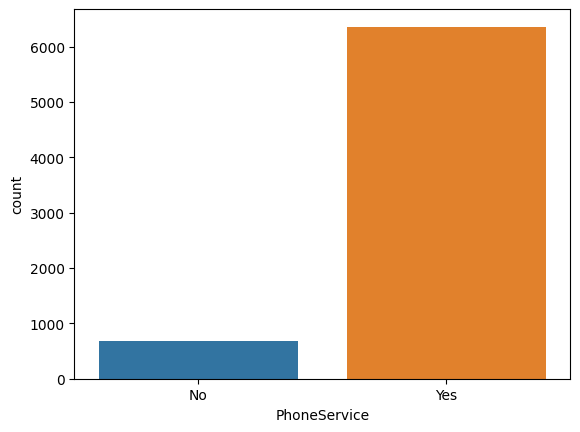

In [35]:
sns.countplot(x = 'PhoneService', data = df)

In [36]:
df.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

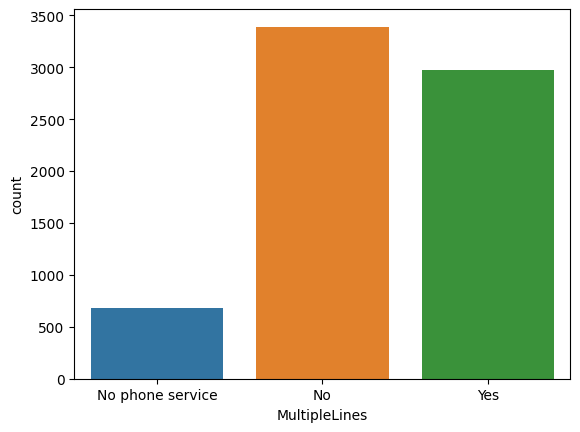

In [37]:
sns.countplot(x = 'MultipleLines', data = df)

* If a customer does not have a phone service, he/she cannot have multiple lines. 
* MultipleLines column includes more specific data compared to PhoneService column. 
* So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. 
* MultipleLines column takes the PhoneService column one step further.

In [38]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


### Contract, Payment Method

In [39]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<Axes: xlabel='Contract', ylabel='count'>

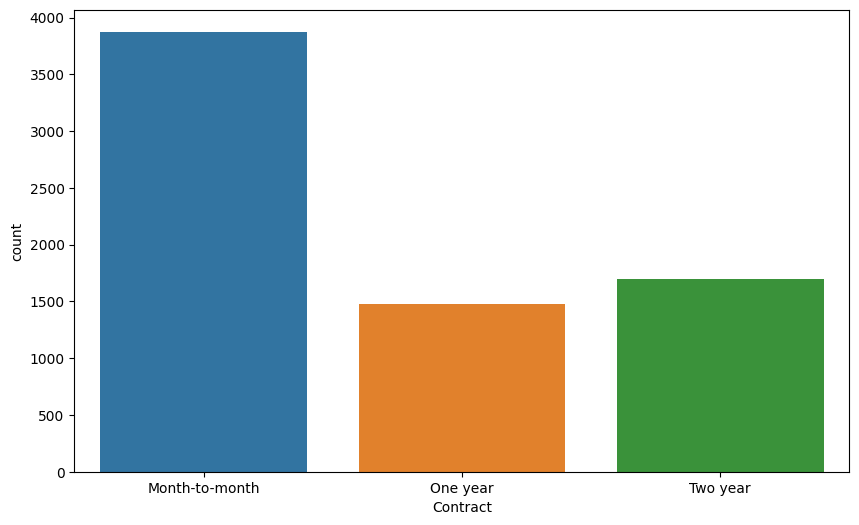

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Contract", data=df)

In [41]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


* It seems like, as expected, **customers with short-term contract are more likely to churn.** 
* This clearly explains the motivation for companies to have long-term relationship with their customers.

<Axes: xlabel='PaymentMethod', ylabel='count'>

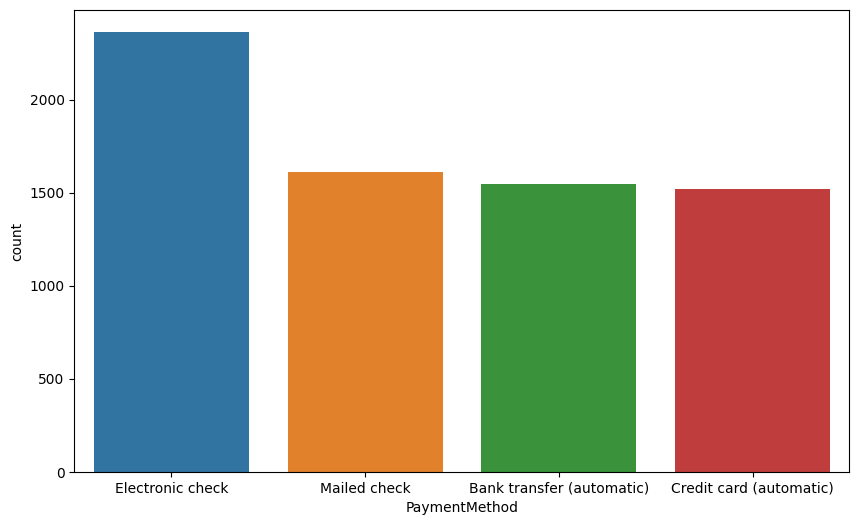

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x= "PaymentMethod", data=df)

In [43]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


### Continuous Variables

* The continuous features are **tenure**, **monthly charges** and **total charges.** 
* The amount in total charges columns is proportional to tenure (months) multiplied by monthly charges. 
* So it is unnecessary to include total charges in the model. Adding unnecassary features will increase the model complexity. 
* It is better to have a simpler model when possible. Complex models tend to overfit and not generalize well to new, previously unseen observations. 
* Since the goal of a machine learning model is to predict or explain new observations, overfitting is a crucial issue.

Let's also have a look at the distribution of continuous features.


In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

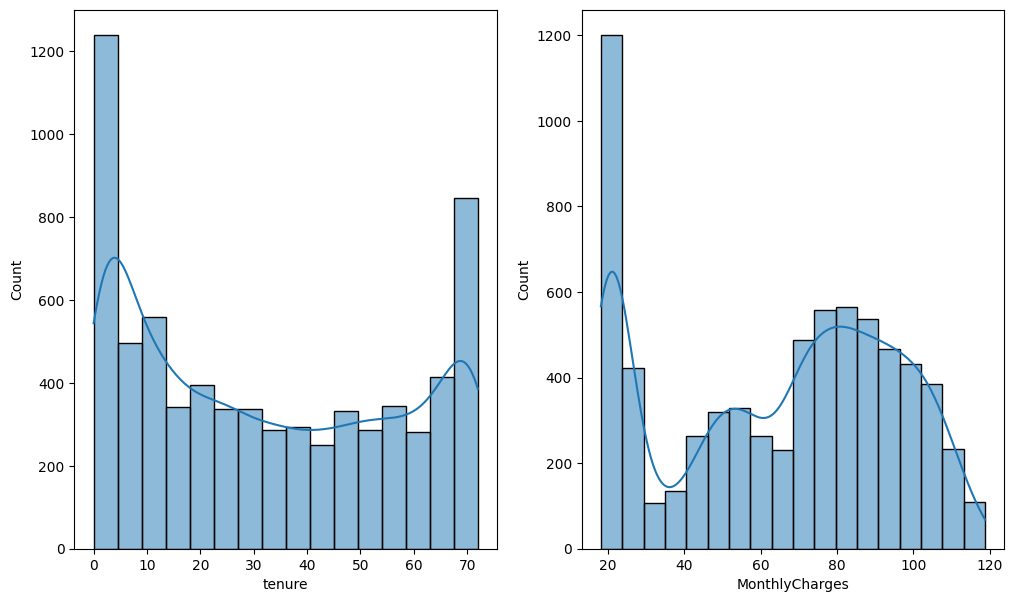

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.histplot(df["tenure"], ax=axes[0], kde =True)
sns.histplot(df["MonthlyCharges"], ax=axes[1], kde =True)

In [46]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


* It is clear that people who have been a customer for a long time tend to stay with the company. 
* The **average tenure in months for people who left the company** is **20 months less than the average for people who stay.** 

* It seems like monthly charges also have an effect on churn rate. 

* Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let's figure out.

In [47]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


* As expected, contract and tenure are highly correlated. 
* Customers with long contracts have been a customer for longer time than customers with short-term contracts. 
* I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:
* 1) Customer ID
* 2) Gender
* 3) PhoneService
* 4) Contract
* 5) TotalCharges

In [48]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [49]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [50]:
df.shape

(7043, 16)

# Data Preprocessing

* Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. 
* The categorical variables in our data set are not ordinal (i.e. there is no order in them). 
* For example, "DSL" internet service is not superior to "Fiber optic" internet service. 
* An example for an ordinal categorical variable would be ratings from 1 to 5 or a variable with categories "bad", "average" and "good". 

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [52]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)




# pd.get_dummies(df, columns=cat_features, drop_first=True): 
# This line uses the pd.get_dummies() function from pandas 
# To perform one-hot encoding on the specified categorical features in df.

In [53]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

# Min-max scaling is a preprocessing technique 
# That transforms numerical features to a specific range 
# (usually between 0 and 1) to ensure that they all have the same scale.

In [54]:
X['tenure'] = a
X['MonthlyCharges'] = b


# Here we are updating the DataFrame X 
# With the scaled values of 'tenure' and 'MonthlyCharges'. 
# You're assigning the scaled values stored 
# In the variables a and b to the corresponding columns in X

In [55]:
X.shape

(7043, 26)

# Resampling

* As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. 
* I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

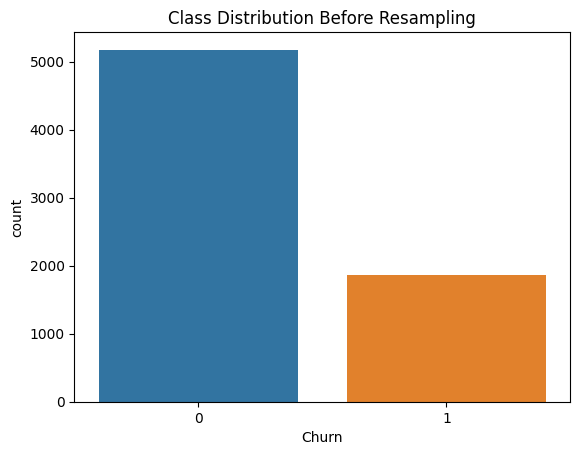

In [56]:
sns.countplot(x ='Churn', data=df).set_title('Class Distribution Before Resampling')

In [57]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]



# We are creating two subsets of the DataFrame X
# Based on the values in the 'Churn' column. 
# The subsets X_no and X_yes contain rows 
# where the 'Churn' column is equal to 0 (not churned) and 1 (churned).


In [58]:
print(len(X_no),len(X_yes))

5174 1869


In [59]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [60]:
X_yes_upsampled.head()
X_no.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.625000,0.239303,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,0.305556,0.704975,0,False,False,True,False,True,True,False,...,False,False,False,True,False,False,True,True,False,False
7,0.138889,0.114428,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [61]:
X_upsampled= pd.concat([X_no,X_yes_upsampled]).reset_index(drop=True)
# adding the upsampled yes cases to the no cases
# to balance the data

In [62]:
X_upsampled

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.625000,0.239303,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.305556,0.704975,0,False,False,True,False,True,True,False,...,False,False,False,True,False,False,True,True,False,False
4,0.138889,0.114428,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.708333,0.408458,1,False,True,True,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
10344,0.041667,0.518905,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
10345,0.833333,0.771144,1,False,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
10346,0.027778,0.309950,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


Text(0.5, 1.0, 'Class Distribution After Resampling')

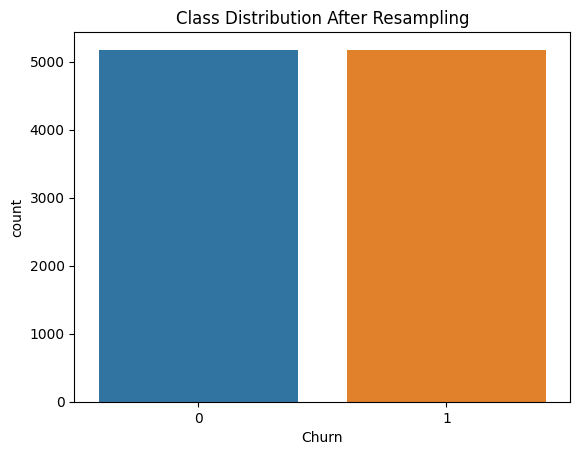

In [63]:
sns.countplot(x ='Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML model

We need to divide the data set into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [64]:
X_upsampled.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.625000,0.239303,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.305556,0.704975,0,False,False,True,False,True,True,False,...,False,False,False,True,False,False,True,True,False,False
4,0.138889,0.114428,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


def Report(name,model, X_train, X_test, y_train, y_test):
    print(name)
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    print(f"accuracy score on training data : {accuracy_score(y_train,pred)} " )
    print(f"F-1 score on training data : {f1_score(y_train,pred)} " )
    print(f"recall score on training data : {recall_score(y_train,pred)} " )
    pred_test = model.predict(X_test)
    print(f"accuracy score on test data : {accuracy_score(y_test,pred_test)} " )
    print(f"F-1 score on test data : {f1_score(y_test,pred_test)} " )
    print(f"recall score on test data : {recall_score(y_test,pred_test)} " )
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred_test)
    
    # Create a figure and axis
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap=plt.cm.Blues)
    
    # Add color bar
    plt.colorbar()
    
    # Set labels and title
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Create tick marks
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
    
    # Add text annotations
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix)):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
    
    # Show the plot
    plt.show()
    

In [69]:
from sklearn.model_selection import GridSearchCV
#parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
def optimization(model, paramneters, n_jobs=-1, cv=5):
    clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)
    return clf
# cv = 5 means having a 5-fold cross validation.
# So dataset is divided into 5 subset.
# At each iteration, 4 subsets are used in training and the other subset is used as test set.
# When 5 iteration completed, the model used all samples as both training and test samples.
# n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [70]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

In [71]:
input = {'X_train' :X_train, "X_test":X_test,'y_train': y_train,'y_test' : y_test}

GaussianNB
accuracy score on training data : 0.6703309978255617 
F-1 score on training data : 0.7366592685515777 
recall score on training data : 0.9202025072324012 
accuracy score on test data : 0.6613526570048309 
F-1 score on test data : 0.7269185820023374 
recall score on test data : 0.9093567251461988 


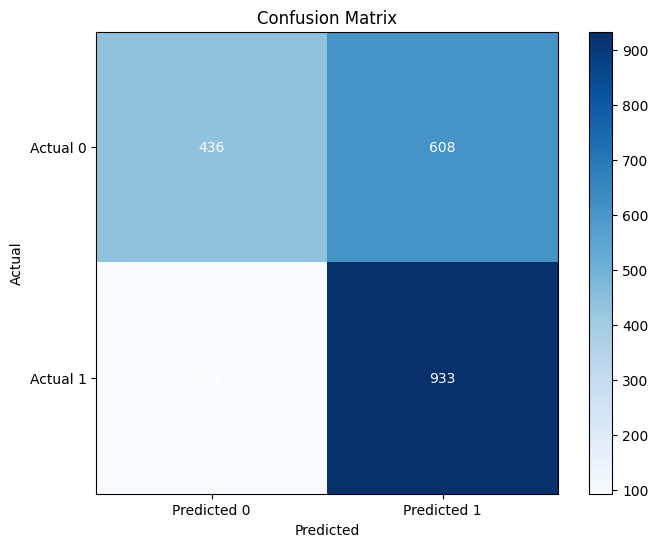

In [72]:
Report("GaussianNB", GaussianNB(), **input)

AdaBoostClassifier
accuracy score on training data : 0.7672143029717323 
F-1 score on training data : 0.7719256716771214 
recall score on training data : 0.7861620057859209 
accuracy score on test data : 0.7671497584541063 
F-1 score on test data : 0.7702573879885605 
recall score on test data : 0.7875243664717348 


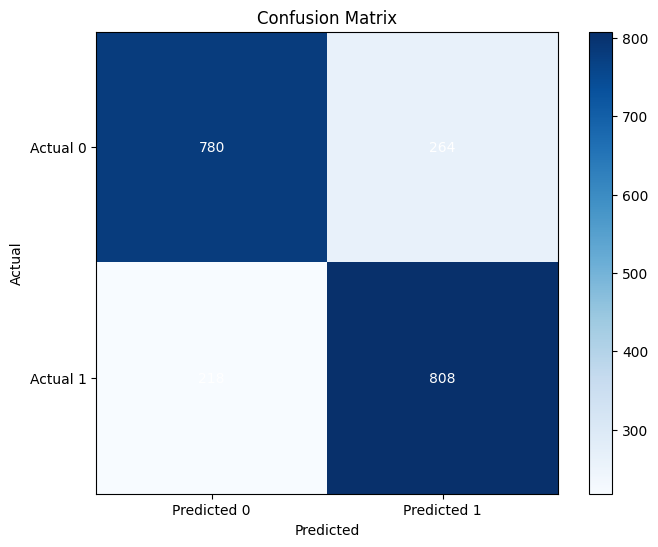

In [73]:
Report("AdaBoostClassifier", AdaBoostClassifier(), **input)

RandomForestClassifier
accuracy score on training data : 0.7449867117661271 
F-1 score on training data : 0.7522591245159018 
recall score on training data : 0.7726615236258437 
accuracy score on test data : 0.7468599033816425 
F-1 score on test data : 0.7507136060894386 
recall score on test data : 0.7690058479532164 


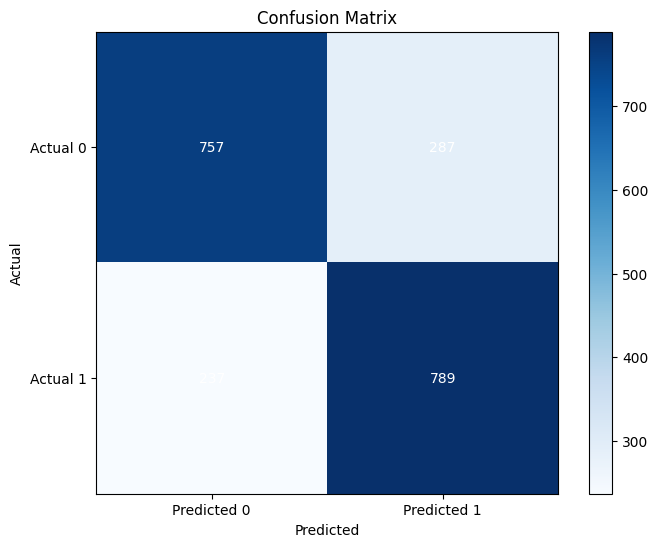

In [74]:
Report("RandomForestClassifier", RandomForestClassifier(n_estimators = 50, max_depth =2), **input)

XGBClassifier
accuracy score on training data : 0.996859144720947 
F-1 score on training data : 0.9968742486174561 
recall score on training data : 0.9995178399228544 
accuracy score on test data : 0.9048309178743962 
F-1 score on test data : 0.9093419236079153 
recall score on test data : 0.9629629629629629 


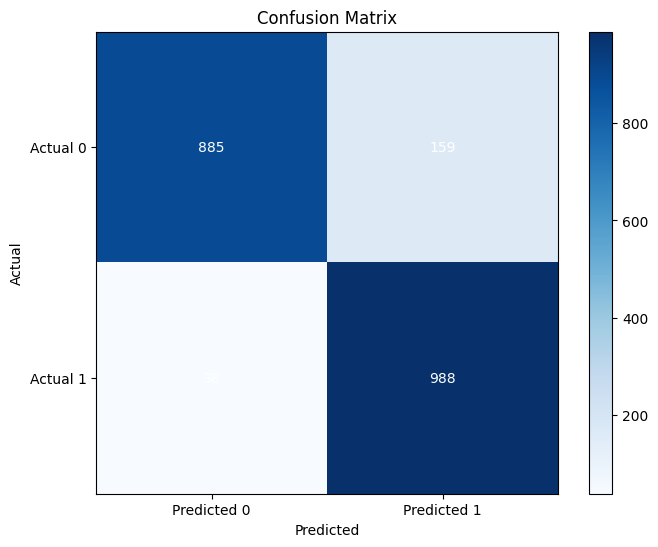

XGBClassifier
accuracy score on training data : 0.6371104131432713 
F-1 score on training data : 0.5156401160915833 
recall score on training data : 0.38548698167791706 
accuracy score on test data : 0.6584541062801932 
F-1 score on test data : 0.5394136807817589 
recall score on test data : 0.40350877192982454 


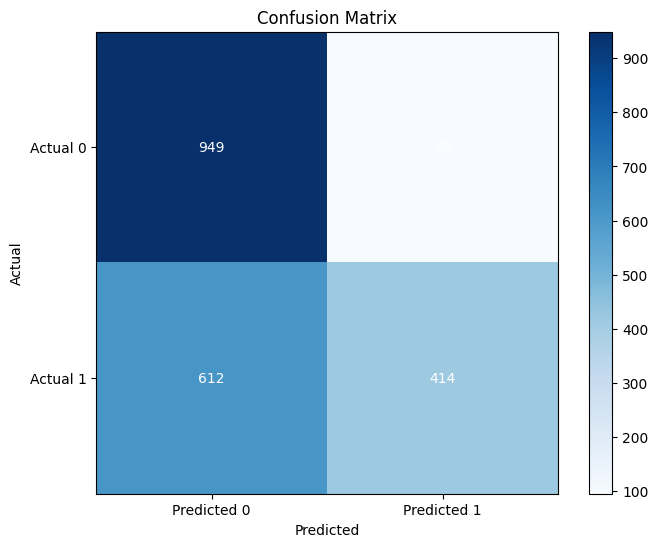

XGBClassifier
accuracy score on training data : 0.7574293307562213 
F-1 score on training data : 0.762254321572342 
recall score on training data : 0.776036644165863 
accuracy score on test data : 0.7608695652173914 
F-1 score on test data : 0.7630445189085687 
recall score on test data : 0.776803118908382 


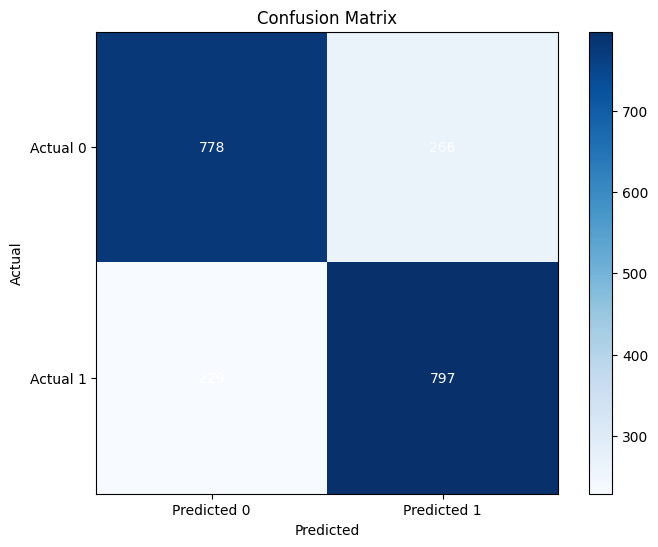

XGBClassifier
accuracy score on training data : 0.7515100265764677 
F-1 score on training data : 0.7527347036903475 
recall score on training data : 0.7548216007714561 
accuracy score on test data : 0.763768115942029 
F-1 score on test data : 0.76410998552822 
recall score on test data : 0.7719298245614035 


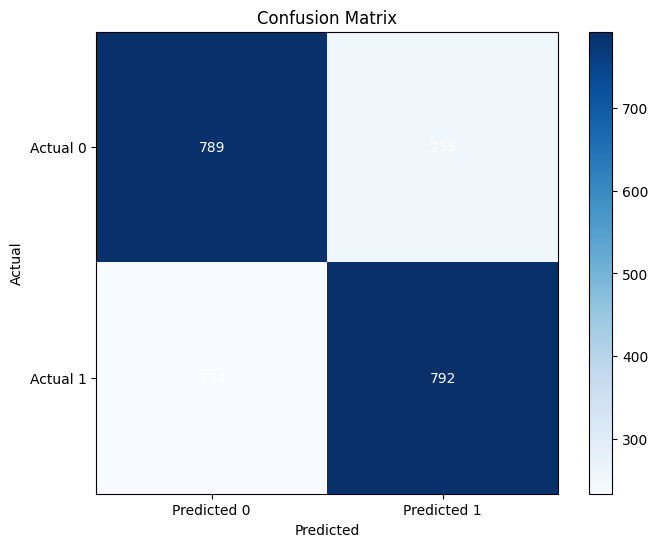

In [75]:
Report("XGBClassifier", XGBClassifier( max_depth =500), **input)
Report("XGBClassifier", PassiveAggressiveClassifier(), **input)
Report("XGBClassifier", RidgeClassifier( ), **input)
Report("XGBClassifier", SGDClassifier(), **input)


In [76]:
################################
##########fill ablove
#########################

### Random Forests

* The accuracy on training set is **4% higher than the accuracy on test set which indicates a slight overfitting.** 
* We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well.
* However, reducing tree depth may also decrease the accuracy. 
* So we need to be careful when optimizing the parameters. 
* We can also increase the number of trees in the forest which will help the model to be more generalized and thus reduce overfitting. 
* **Parameter tuning is a very critical part in almost every project.**



Another way is to do cross-validation which allows to use every sample in training and test set. 

GridSearchCV makes this process easy to handle. We can both do cross-validation and try different parameters using GridSearchCV.

In [77]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

* **cv = 5 means having a 5-fold cross validation.**
* So dataset is divided into 5 subset. 
* At each iteration, 4 subsets are used in training and the other subset is used as test set. 
* When 5 iteration completed, the model used all samples as both training and test samples.

n_jobs parameter is used to select how many processors to use. -1 means using all processors.

In [78]:
#clf.best_params_

In [79]:
#clf.best_score_

* We have achieved an overall accuracy of almost **90%.** 
* This is the mean cross-validated score of the best_estimator. 
* In the previous random forest, the mean score was approximately 86% (88% on training and 84% on test). 
* Using GridSearchCV, we improved the model accuracy by 4%.